*Task 2: MNIST Digit Recognitiona*

In [1]:
!pip install tensorflow matplotlib scikit-learn seaborn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape, x_test.shape


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [3]:
# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension (for CNN)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape


(60000, 28, 28, 1)

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 122ms/step - accuracy: 0.8590 - loss: 0.5188 - val_accuracy: 0.9817 - val_loss: 0.0628
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 118ms/step - accuracy: 0.9817 - loss: 0.0629 - val_accuracy: 0.9872 - val_loss: 0.0435
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 115ms/step - accuracy: 0.9878 - loss: 0.0406 - val_accuracy: 0.9877 - val_loss: 0.0437
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9885 - val_loss: 0.0410
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 116ms/step - accuracy: 0.9922 - loss: 0.0232 - val_accuracy: 0.9888 - val_loss: 0.0406


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9868 - loss: 0.0398
Test Accuracy: 0.9889000058174133


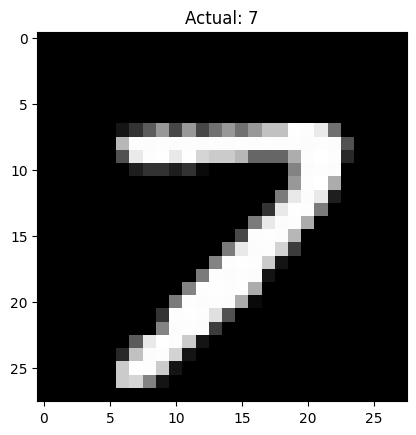

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted: 7


In [8]:
import random

i = random.randint(0, len(x_test)-1)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("Actual: " + str(y_test[i]))
plt.show()

pred = model.predict(x_test[i].reshape(1,28,28,1))
print("Predicted:", np.argmax(pred))
